In [ ]:
# Data Cleaning

In [2]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split

# Load the JSONL file into a DataFrame
file_path = "Cell_Phones_and_Accessories_5.json"

# Read the JSONL data
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))  # Load each JSON object
df = pd.DataFrame(data)

# Data Cleaning
# Drop rows with missing values
df.dropna(inplace=True)

# Standardize text fields
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]', '', regex=True)

# Convert 'reviewTime' to a datetime object
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Dataset Splitting
train, temp = train_test_split(df, test_size=0.2, random_state=42)  # 80% train
validation, test = train_test_split(temp, test_size=0.5, random_state=42)  # 10% validation, 10% test

# Save splits if needed
train.to_csv("train.csv", index=False)
validation.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)


In [ ]:
# Check the number of rows in the dataset
print(f"Number of rows in the dataset: {df.shape[0]}")

# Display a single entry
print(df.iloc[0])  # Replace 0 with the desired row index to check a different entry

In [ ]:
# EDA

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Check basic statistics
print("Statistical Summary:")
print(df[['overall']].describe())  # 'overall' column is assumed to hold ratings

# **1. Distribution of Ratings**
plt.hist(df['overall'], bins=5, edgecolor='black', alpha=0.7)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))
plt.show()

# **2. Word Cloud for Review Text**
text_data = " ".join(review for review in df['reviewText'] if isinstance(review, str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Review Text")
plt.show()

# **3. Temporal Analysis of Reviews**
if 'reviewTime' in df.columns:
    df['reviewYear'] = df['reviewTime'].dt.year  # Extract year from the timestamp
    df['reviewYear'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
    plt.title("Review Counts by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Reviews")
    plt.show()
else:
    print("No 'reviewTime' column found for temporal analysis.")




Number of rows in the dataset: 190920
reviewerID                                           A30TL5EWN6DFXT
asin                                                     120401325X
reviewerName                                              christina
helpful                                                      [0, 0]
reviewText        they look good and stick good i just dont like...
overall                                                         4.0
summary                                                  Looks Good
unixReviewTime                                           1400630400
reviewTime                                      2014-05-21 00:00:00
Name: 0, dtype: object
Statistical Summary:
             overall
count  190920.000000
mean        4.128253
std         1.223434
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Basic Dataset Information:
Number of rows (entries): 190920
Number of columns: 9
Number of unique users: 27874
Number

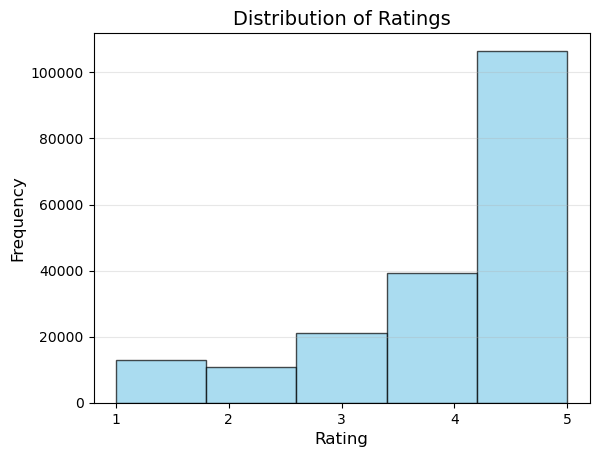


Time Period Covered:
Start Year: 2001, End Year: 2014


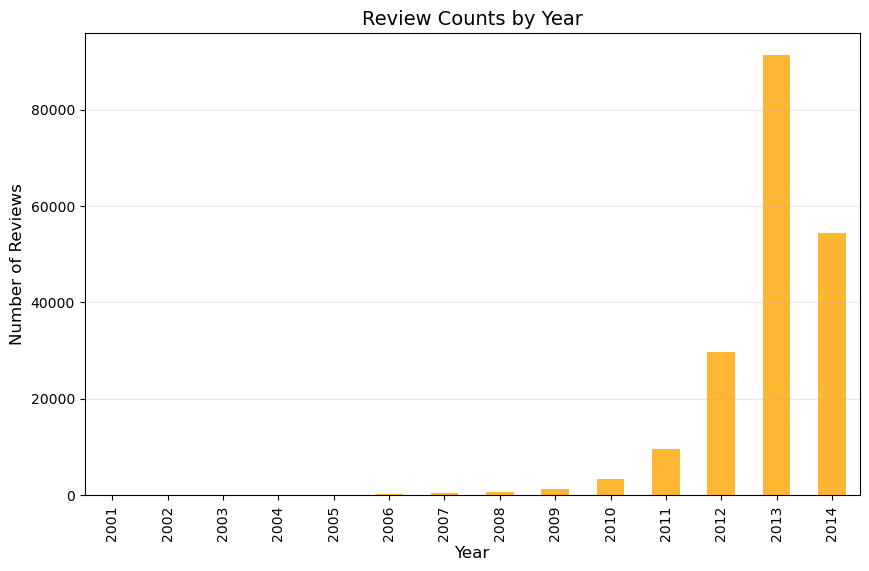

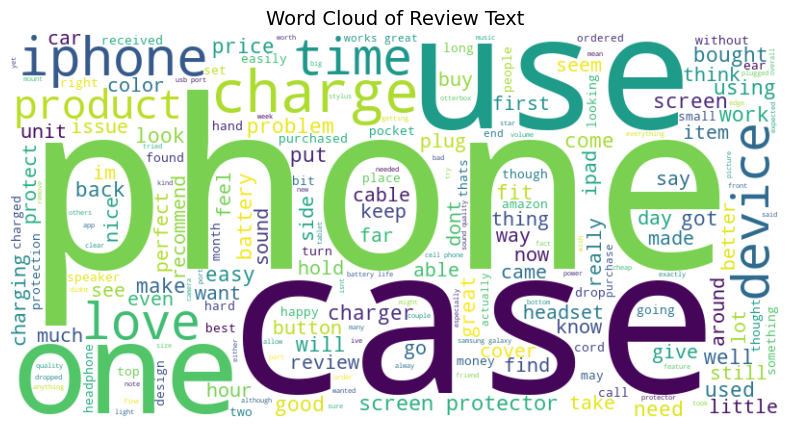

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kcasimiro/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 10 Significant Terms and Their Frequencies:
phone: 171514
case: 143653
one: 84531
like: 71493
great: 65418
use: 60634
screen: 59284
good: 57502
battery: 56656
would: 53987


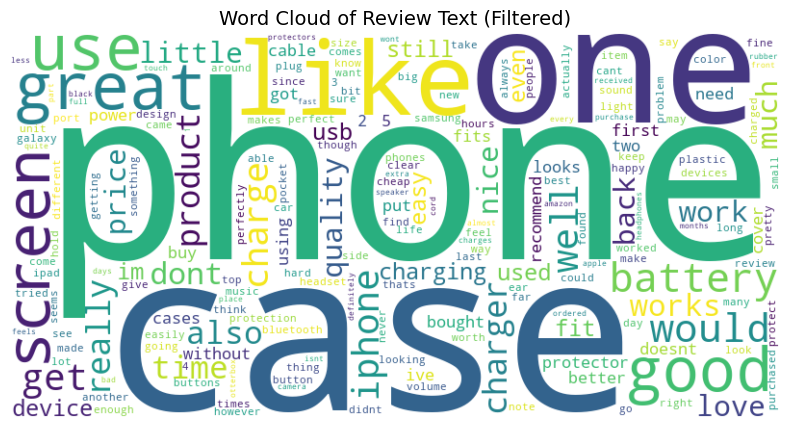


Average Review Length by Rating:
overall
1.0     77.195749
2.0     96.687942
3.0     96.171151
4.0    110.479023
5.0     85.077731
Name: reviewLength, dtype: float64


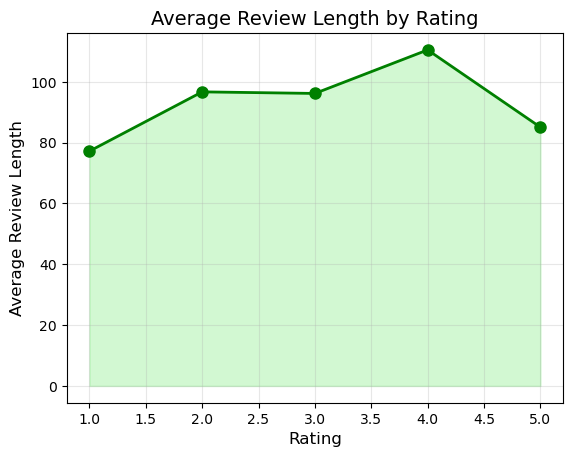


Average Helpfulness Votes by Rating:
overall
1.0    1.705842
2.0    1.073009
3.0    1.634211
4.0    1.549879
5.0    1.403188
Name: helpfulVotes, dtype: float64


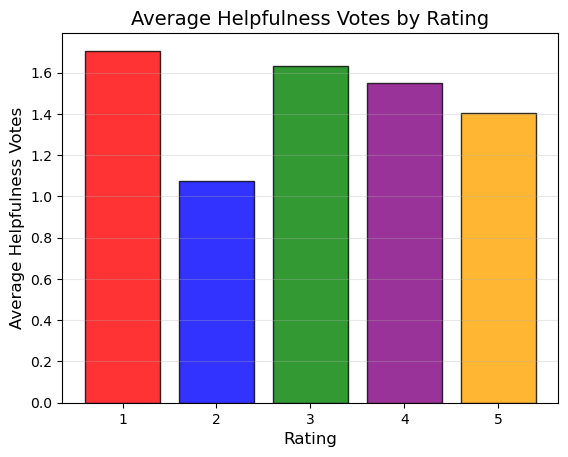

In [6]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the JSONL file into a DataFrame
file_path = "Cell_Phones_and_Accessories_5.json"

# Read the JSONL data
data = []
with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))  # Load each JSON object
df = pd.DataFrame(data)

# Data Cleaning
# Drop rows with missing values
df.dropna(inplace=True)

# Standardize text fields
df['reviewText'] = df['reviewText'].str.lower()
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]', '', regex=True)

# Convert 'reviewTime' to a datetime object
df['reviewTime'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Dataset Splitting
train, temp = train_test_split(df, test_size=0.2, random_state=42)  # 80% train
validation, test = train_test_split(temp, test_size=0.5, random_state=42)  # 10% validation, 10% test

# Save splits if needed
train.to_csv("train.csv", index=False)
validation.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)

# Check the number of rows in the dataset
print(f"Number of rows in the dataset: {df.shape[0]}")

# Display a single entry
print(df.iloc[0])  # Replace 0 with the desired row index to check a different entry

# Check basic statistics
print("Statistical Summary:")
print(df[['overall']].describe())  # 'overall' column is assumed to hold ratings

# **1. Basic Dataset Information**
print("Basic Dataset Information:")
print(f"Number of rows (entries): {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Count unique users and items
num_users = df['reviewerID'].nunique()
num_items = df['asin'].nunique()

print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")

# **2. Distribution of Ratings**
plt.hist(df['overall'], bins=5, edgecolor='black', alpha=0.7, color='skyblue')
plt.title("Distribution of Ratings", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.3)
plt.show()

# **3. Time Period of the Dataset**
if 'reviewTime' in df.columns:
    df['reviewYear'] = df['reviewTime'].dt.year  # Extract year from the timestamp
    print("\nTime Period Covered:")
    print(f"Start Year: {df['reviewYear'].min()}, End Year: {df['reviewYear'].max()}")
    df['reviewYear'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.8)
    plt.title("Review Counts by Year", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Reviews", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# **4. Word Cloud for Review Text**
text_data = " ".join(review for review in df['reviewText'] if isinstance(review, str))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Review Text", fontsize=14)
plt.show()

from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Combine all review text into a single string
text_data = " ".join(review for review in df['reviewText'] if isinstance(review, str))

# Define a set of stopwords (you can add/remove words as needed)
stop_words = set(stopwords.words('english'))

# Tokenize text and filter out stopwords
filtered_words = [word for word in text_data.split() if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 10 most common terms
top_terms = word_counts.most_common(10)

# Print the top terms
print("Top 10 Significant Terms and Their Frequencies:")
for term, freq in top_terms:
    print(f"{term}: {freq}")

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(word_counts)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Review Text (Filtered)", fontsize=14)
plt.show()


# **5. Interesting Phenomena: Review Length vs. Ratings**
df['reviewLength'] = df['reviewText'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)
avg_length_by_rating = df.groupby('overall')['reviewLength'].mean()

print("\nAverage Review Length by Rating:")
print(avg_length_by_rating)

plt.plot(avg_length_by_rating.index, avg_length_by_rating.values, marker='o', color='green', linewidth=2, markersize=8)
plt.fill_between(avg_length_by_rating.index, avg_length_by_rating.values, color='lightgreen', alpha=0.4)
plt.title("Average Review Length by Rating", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Average Review Length", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# **6. Helpfulness Votes Analysis (if available)**
if 'helpful' in df.columns:
    df['helpfulVotes'] = df['helpful'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 0)
    avg_helpfulness_by_rating = df.groupby('overall')['helpfulVotes'].mean()

    print("\nAverage Helpfulness Votes by Rating:")
    print(avg_helpfulness_by_rating)

    plt.bar(avg_helpfulness_by_rating.index, avg_helpfulness_by_rating.values, color=['red', 'blue', 'green', 'purple', 'orange'], alpha=0.8, edgecolor='black')
    plt.title("Average Helpfulness Votes by Rating", fontsize=14)
    plt.xlabel("Rating", fontsize=12)
    plt.ylabel("Average Helpfulness Votes", fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()


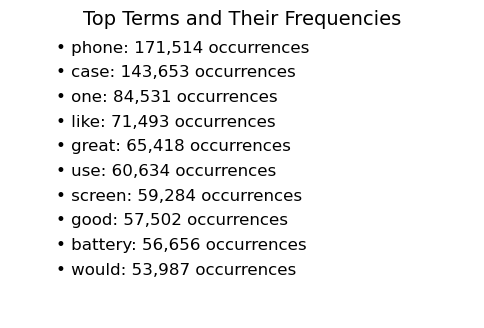

In [7]:
import matplotlib.pyplot as plt

# Data for the list
terms = [
    ("phone", "171,514 occurrences"),
    ("case", "143,653 occurrences"),
    ("one", "84,531 occurrences"),
    ("like", "71,493 occurrences"),
    ("great", "65,418 occurrences"),
    ("use", "60,634 occurrences"),
    ("screen", "59,284 occurrences"),
    ("good", "57,502 occurrences"),
    ("battery", "56,656 occurrences"),
    ("would", "53,987 occurrences")
]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')  # Turn off the axes

# Title
ax.text(0.5, 1.0, "Top Terms and Their Frequencies", fontsize=14, ha='center', va='top', transform=ax.transAxes)

# List the terms
y = 0.9
for term, occurrences in terms:
    ax.text(0.1, y, f"• {term}: {occurrences}", fontsize=12, va='top', transform=ax.transAxes)
    y -= 0.08  # Adjust spacing between lines

# Save the figure
plt.savefig("list_image.png", dpi=300, bbox_inches='tight')
plt.show()
